In [7]:
import pandas as pd

file_path_baseline = 'result_baseline.tsv'
file_path_ratio82 = 'result_ratio_8_2.tsv'

baseline_df = pd.read_csv(file_path_baseline, sep='\t')
adjusted_df = pd.read_csv(file_path_ratio82, sep='\t')

In [8]:
print(baseline_df.head())
print(adjusted_df.head())

                         original             summary
0  describe the taste in one word                 not
1                 favorite coffee  my favorite coffee
2            yummy coconut flavor        great coffee
3                        so yummy         great candy
4    teeccino herbal coffee mocha        great coffee
                         original       summary
0  describe the taste in one word    not stevia
1                 favorite coffee  great coffee
2            yummy coconut flavor       love it
3                        so yummy          zotz
4    teeccino herbal coffee mocha  great coffee


In [14]:
# adjusted 데이터프레임의 summary 열에 새로운 이름 부여
adjusted_df = adjusted_df.rename(columns={'summary': 'summary_adjusted'})

# baseline 데이터프레임에 adjusted 데이터프레임의 summary_adjusted 열 추가
merged_df = pd.concat([baseline_df, adjusted_df['summary_adjusted']], axis=1)

# 결과 확인
print(merged_df.head())

                         original             summary summary_adjusted
0  describe the taste in one word                 not       not stevia
1                 favorite coffee  my favorite coffee     great coffee
2            yummy coconut flavor        great coffee          love it
3                        so yummy         great candy             zotz
4    teeccino herbal coffee mocha        great coffee     great coffee


In [23]:
# 두 행의 summary 열의 단어 수를 통계로 만들기
baseline_df['word_count_baseline'] = baseline_df['summary'].apply(lambda x: len(str(x).split()))
adjusted_df['word_count_adjusted'] = adjusted_df['summary_adjusted'].apply(lambda x: len(str(x).split()))

# 평균 단어 수 계산
average_word_count_baseline = baseline_df['word_count_baseline'].mean()
average_word_count_adjusted = adjusted_df['word_count_adjusted'].mean()

# 결과 출력
print(f"평균 단어 수 (baseline): {average_word_count_baseline:.2f}")
print(f"평균 단어 수 (adjusted): {average_word_count_adjusted:.2f}")

평균 단어 수 (baseline): 3.22
평균 단어 수 (adjusted): 1.89


In [24]:
!pip install nrclex
from nrclex import NRCLex

In [33]:
# adjusted 데이터프레임의 summary 열에 새로운 이름 부여
adjusted_df = adjusted_df.rename(columns={'summary': 'summary_adjusted'})

# 감정 단어 수를 저장할 열 추가
baseline_df['total_emotion_words_baseline'] = baseline_df['summary'].apply(lambda x: sum(1 for word in NRCLex(x).words if word in NRCLex(x).affect_frequencies))
adjusted_df['total_emotion_words_adjusted'] = adjusted_df['summary_adjusted'].apply(lambda x: sum(1 for word in NRCLex(x).words if word in NRCLex(x).affect_frequencies))


In [34]:
# total_emotion이 0이 아닌 행만 추출
non_zero_baseline_df = baseline_df[baseline_df['total_emotion_words_baseline'] != 0]
non_zero_adjusted_df = adjusted_df[adjusted_df['total_emotion_words_adjusted'] != 0]

# 결과 확인
print(non_zero_baseline_df[['summary', 'total_emotion_words_baseline']])
print(non_zero_adjusted_df[['summary_adjusted', 'total_emotion_words_adjusted']])


                                 summary  total_emotion_words_baseline
237    tastes like fear sustained energy                             1
9007           gives a fear a the energy                             1
16038          no fear a fear the energy                             2
Empty DataFrame
Columns: [summary_adjusted, total_emotion_words_adjusted]
Index: []


In [32]:
!pip install pandas matplotlib wordcloud
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

<ipython-input-35-7c59f2d72183>:30: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  plt.tight_layout()
<ipython-input-35-7c59f2d72183>:30: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from current font.
  plt.tight_layout()
<ipython-input-35-7c59f2d72183>:30: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  plt.tight_layout()
<ipython-input-35-7c59f2d72183>:30: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.tight_layout()
<ipython-input-35-7c59f2d72183>:30: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  plt.tight_layout()
<ipython-input-35-7c59f2d72183>:30: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  plt.tight_layout()
<ipython-input-35-7c59f2d72183>:30: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pyla

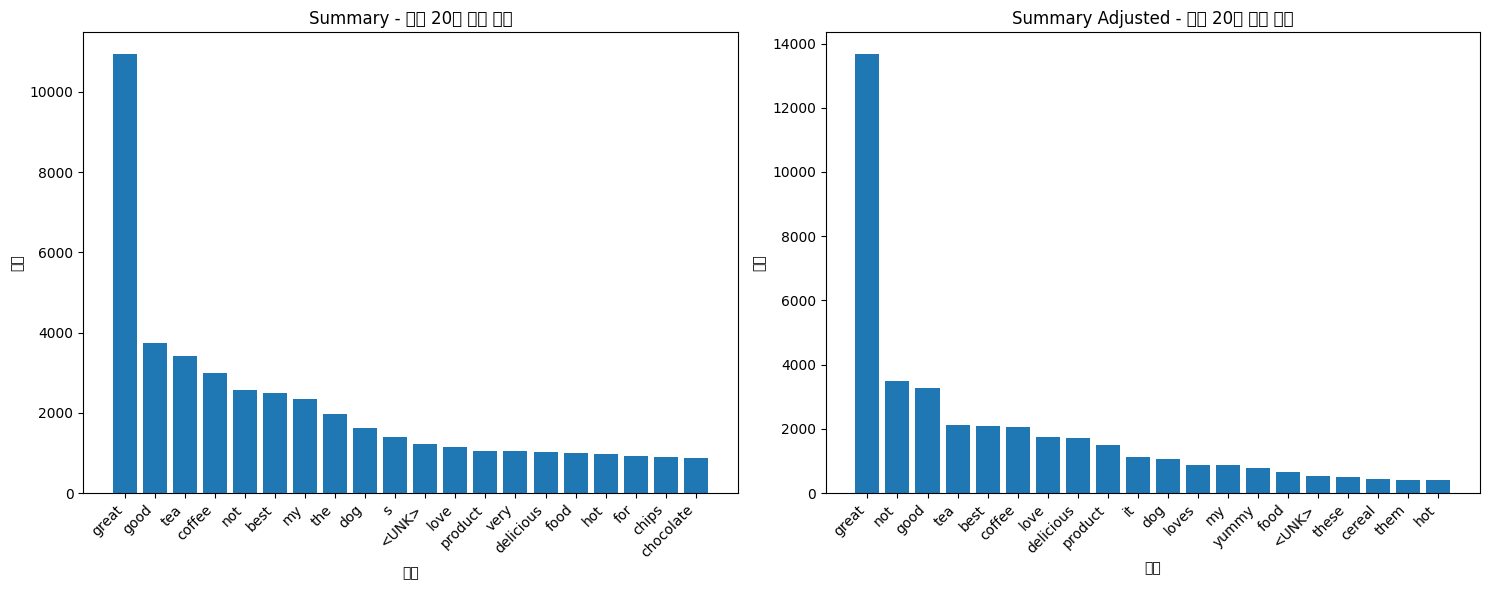

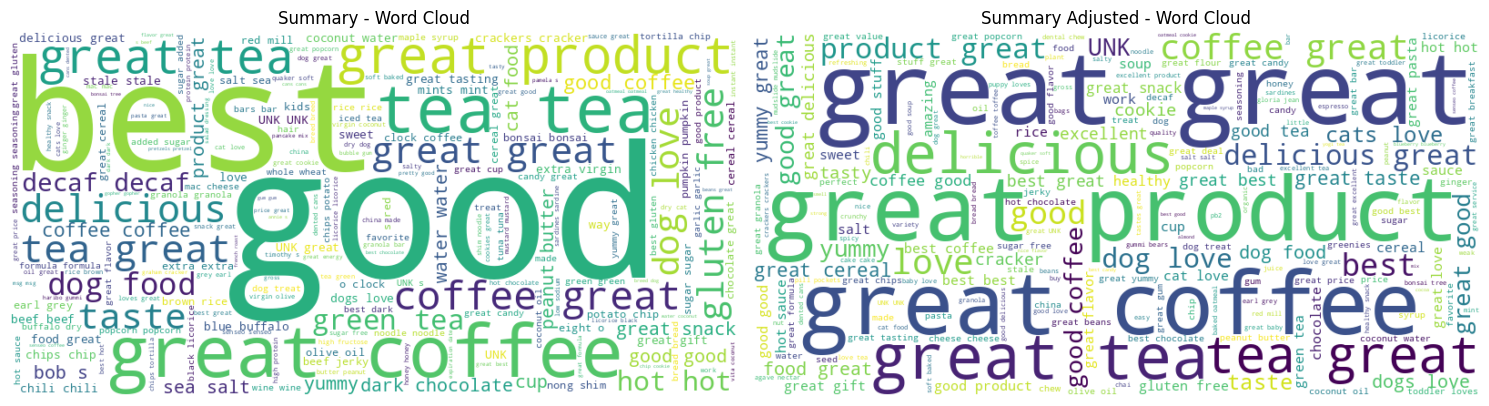

In [35]:
# 텍스트 데이터 합치기 (공백 기준)
all_text_summary = ' '.join(merged_df['summary'])
all_text_summary_adjusted = ' '.join(merged_df['summary_adjusted'])

# 단어 빈도 분석
word_freq_summary = Counter(all_text_summary.split())
word_freq_summary_adjusted = Counter(all_text_summary_adjusted.split())

# 가장 빈도가 높은 단어 상위 20개 추출
top_words_summary = word_freq_summary.most_common(20)
top_words_summary_adjusted = word_freq_summary_adjusted.most_common(20)

# 시각화: 단어 빈도 막대 그래프
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.bar(*zip(*top_words_summary))
plt.xlabel('단어')
plt.ylabel('빈도')
plt.title('Summary - 상위 20개 단어 빈도')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
plt.bar(*zip(*top_words_summary_adjusted))
plt.xlabel('단어')
plt.ylabel('빈도')
plt.title('Summary Adjusted - 상위 20개 단어 빈도')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# 시각화: Word Cloud
wordcloud_summary = WordCloud(width=800, height=400, background_color='white').generate(all_text_summary)
wordcloud_summary_adjusted = WordCloud(width=800, height=400, background_color='white').generate(all_text_summary_adjusted)

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_summary, interpolation='bilinear')
plt.axis('off')
plt.title('Summary - Word Cloud')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_summary_adjusted, interpolation='bilinear')
plt.axis('off')
plt.title('Summary Adjusted - Word Cloud')

plt.tight_layout()
plt.show()

In [36]:
# 텍스트 출력
print("Top 20 words in 'summary' along with their frequencies:")
for word, frequency in top_words_summary:
    print(f"{word}: {frequency}")

print("\n" + "=" * 50 + "\n")  # 구분선

print("Top 20 words in 'summary_adjusted' along with their frequencies:")
for word, frequency in top_words_summary_adjusted:
    print(f"{word}: {frequency}")

Top 20 words in 'summary' along with their frequencies:
great: 10940
good: 3741
tea: 3415
coffee: 3006
not: 2567
best: 2497
my: 2334
the: 1960
dog: 1616
s: 1395
<UNK>: 1223
love: 1151
product: 1050
very: 1037
delicious: 1022
food: 1006
hot: 971
for: 923
chips: 909
chocolate: 878


Top 20 words in 'summary_adjusted' along with their frequencies:
great: 13666
not: 3489
good: 3270
tea: 2126
best: 2097
coffee: 2072
love: 1736
delicious: 1713
product: 1488
it: 1120
dog: 1073
loves: 870
my: 864
yummy: 768
food: 666
<UNK>: 520
these: 500
cereal: 426
them: 409
hot: 402


In [37]:
!pip install nltk

In [41]:
import nltk
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag, word_tokenize

def count_adjectives(text):
    tokens = word_tokenize(text)
    tagged_words = pos_tag(tokens)
    adjectives = [word for word, pos in tagged_words if pos.startswith('JJ')]
    return len(adjectives)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [43]:

# 'summary' 열에서 형용사 수 세기
merged_df['adjectives_count_summary'] = merged_df['summary'].apply(count_adjectives)

# 'summary_adjusted' 열에서 형용사 수 세기
merged_df['adjectives_count_summary_adjusted'] = merged_df['summary_adjusted'].apply(count_adjectives)

# 결과 출력
print("Summary - 형용사 수:")
print(merged_df[['summary', 'adjectives_count_summary']])

print("\n" + "="*50 + "\n")  # 구분선

print("Summary Adjusted - 형용사 수:")
print(merged_df[['summary_adjusted', 'adjectives_count_summary_adjusted']])




Summary - 형용사 수:
                                     summary  adjectives_count_summary
0                                        not                         0
1                         my favorite coffee                         1
2                               great coffee                         1
3                                great candy                         1
4                               great coffee                         1
...                                      ...                       ...
34854                                best pb                         1
34855   i do not buy this tea at a the price                         0
34856                            <UNK> <UNK>                         1
34857  too sweet not too sweet not too sweet                         3
34858                  great tasting granola                         1

[34859 rows x 2 columns]


Summary Adjusted - 형용사 수:
         summary_adjusted  adjectives_count_summary_adjusted
0              n

In [45]:
total_adjectives_summary = merged_df['adjectives_count_summary'].sum()
total_adjectives_summary_adjusted = merged_df['adjectives_count_summary_adjusted'].sum()

print(f"Summary - 형용사 수의 총합: {total_adjectives_summary}")
print(f"Summary Adjusted - 형용사 수의 총합: {total_adjectives_summary_adjusted}")


Summary - 형용사 수의 총합: 31643
Summary Adjusted - 형용사 수의 총합: 24482


In [ ]:
# 'summary' 열에서 형용사 추출
all_adjectives_summary = [word for text in merged_df['summary'] for word, pos in pos_tag(word_tokenize(text)) if pos.startswith('JJ')]

# 'summary_adjusted' 열에서 형용사 추출
all_adjectives_summary_adjusted = [word for text in merged_df['summary_adjusted'] for word, pos in pos_tag(word_tokenize(text)) if pos.startswith('JJ')]

# 각 형용사의 등장 횟수 계산
adjectives_count_summary = Counter(all_adjectives_summary)
adjectives_count_summary_adjusted = Counter(all_adjectives_summary_adjusted)



In [49]:
# 최소 횟수 설정
min_count = 50

# 각 형용사와 등장 횟수를 세로로 출력 (최소 횟수 이상만)
print("Summary - 각 형용사의 등장 횟수:")
for adjective, count in adjectives_count_summary.items():
    if count >= min_count:
        print(f"{adjective}: {count}")

print("\n" + "=" * 50 + "\n")  # 구분선

print("Summary Adjusted - 각 형용사의 등장 횟수:")
for adjective, count in adjectives_count_summary_adjusted.items():
    if count >= min_count:
        print(f"{adjective}: {count}")

Summary - 각 형용사의 등장 횟수:
favorite: 260
great: 10940
delicious: 1022
best: 2338
<: 930
high: 328
good: 3518
low: 274
french: 161
hot: 923
s: 175
black: 215
garlic: 130
brown: 85
whole: 209
nice: 126
extra: 433
pumpkin: 52
dark: 143
healthy: 222
gluten: 351
free: 689
organic: 283
soft: 143
oatmeal: 102
green: 654
white: 171
better: 87
regular: 83
salty: 94
noodle: 201
blue: 282
dry: 227
senseo: 108
stale: 231
olive: 188
sweet: 207
nutiva: 83
fructose: 59
timothy: 128
gross: 125
sour: 109
bubble: 89
shim: 151
popcorn: 106
quick: 60
alternative: 65
iced: 101
instant: 63
dog: 84
cheese: 145
wine: 76
tea: 52
dental: 50
english: 108
red: 66
amish: 80
worst: 68


Summary Adjusted - 각 형용사의 등장 횟수:
great: 13666
delicious: 1713
<: 478
best: 1920
good: 3246
gluten: 72
free: 292
nice: 144
hot: 396
favorite: 68
oatmeal: 62
green: 159
excellent: 235
bad: 76
organic: 76
weak: 53
easy: 50
little: 60
sweet: 56
cheese: 61
healthy: 166
strong: 50
olive: 67
tasty: 56
puppy: 59


In [50]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


num_topics = 7  # 추출할 주제의 수를 지정합니다.


# 데이터 전처리: 텍스트 데이터를 벡터화
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(merged_df['summary'])

# LDA 모델 학습

lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

# 각 리뷰가 어떤 주제에 속하는지 예측
topic_assignments = lda.transform(X)

# 학습된 LDA 모델의 주제와 관련된 단어 출력
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    top_features_idx = topic.argsort()[-10:][::-1]
    top_features = [feature_names[i] for i in top_features_idx]
    print(f"주제 {topic_idx + 1}: {', '.join(top_features)}")

# 각 리뷰에 할당된 주제 출력
merged_df['assigned_topic'] = topic_assignments.argmax(axis=1)
print(merged_df[['summary', 'assigned_topic']])


주제 1: good, tea, great, coffee, green, decaf, beef, ginger, pumpkin, gum
주제 2: great, best, product, cereal, cat, rice, yummy, gift, snack, pasta
주제 3: dog, unk, chips, loves, great, food, crackers, popcorn, peanut, butter
주제 4: love, delicious, free, gluten, salt, bars, stale, best, sea, dogs
주제 5: hot, chocolate, water, sugar, best, coconut, like, oil, dark, extra
                                     summary  assigned_topic
0                                        not               0
1                         my favorite coffee               0
2                               great coffee               0
3                                great candy               1
4                               great coffee               0
...                                      ...             ...
34854                                best pb               2
34855   i do not buy this tea at a the price               0
34856                            <UNK> <UNK>               2
34857  too sweet not 

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 데이터 전처리: 텍스트 데이터를 벡터화
vectorizer = CountVectorizer(stop_words='english')
X_adjusted = vectorizer.fit_transform(merged_df['summary_adjusted'])

# LDA 모델 학습

lda_adjusted = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_adjusted.fit(X_adjusted)

# 각 리뷰가 어떤 주제에 속하는지 예측
topic_assignments_adjusted = lda_adjusted.transform(X_adjusted)

# 학습된 LDA 모델의 주제와 관련된 단어 출력
feature_names_adjusted = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda_adjusted.components_):
    top_features_idx = topic.argsort()[-10:][::-1]
    top_features_adjusted = [feature_names_adjusted[i] for i in top_features_idx]
    print(f"주제 {topic_idx + 1} (Adjusted): {', '.join(top_features_adjusted)}")

# 각 리뷰에 할당된 주제 출력 (Adjusted)
merged_df['assigned_topic_adjusted'] = topic_assignments_adjusted.argmax(axis=1)
print(merged_df[['summary_adjusted', 'assigned_topic_adjusted']])


주제 1 (Adjusted): great, tea, excellent, flavor, chocolate, free, cookies, crackers, bread, sugar
주제 2 (Adjusted): great, coffee, yummy, cereal, oil, cat, popcorn, amazing, flour, mix
주제 3 (Adjusted): good, love, coffee, hot, cats, dogs, stuff, tasty, sauce, price
주제 4 (Adjusted): great, delicious, product, unk, taste, snack, soup, gift, chips, water
주제 5 (Adjusted): best, great, dog, loves, food, pasta, tastes, like, salt, candy
         summary_adjusted  assigned_topic_adjusted
0              not stevia                        4
1            great coffee                        1
2                 love it                        2
3                    zotz                        4
4            great coffee                        1
...                   ...                      ...
34854                best                        4
34855           great tea                        0
34856               great                        3
34857                 not                        0
34858 

In [53]:
for topic_idx in range(num_topics):
    # baseline 주제의 상위 단어
    top_features_baseline = [feature_names[i] for i in lda.components_[topic_idx].argsort()[-10:][::-1]]

    # adjusted 주제의 상위 단어
    top_features_adjusted = [feature_names[i] for i in lda_adjusted.components_[topic_idx].argsort()[-10:][::-1]]

    # 각 주제에 속한 공통 단어 찾기
    common_words = set(top_features_baseline).intersection(top_features_adjusted)

    # 결과 출력
    print(f"주제 {topic_idx + 1} (Baseline): {', '.join(top_features_baseline)}")
    print(f"주제 {topic_idx + 1} (Adjusted): {', '.join(top_features_adjusted)}")
    print(f"주제 {topic_idx + 1}의 공통 단어: {', '.join(common_words)}\n")


주제 1 (Baseline): good, tea, great, coffee, green, decaf, beef, ginger, pumpkin, gum
주제 1 (Adjusted): description, olive, clorets, cookies, bpa, cranberry, butler, cake, bar, noodles
주제 1의 공통 단어: 

주제 2 (Baseline): great, best, product, cereal, cat, rice, yummy, gift, snack, pasta
주제 2 (Adjusted): description, brussel, pretzel, bitters, issimo, birthday, licorice, achiote, cotton, havahart
주제 2의 공통 단어: 

주제 3 (Baseline): dog, unk, chips, loves, great, food, crackers, popcorn, peanut, butter
주제 3 (Adjusted): davidson, gluten, brussel, eden, bisquick, chia, nong, old, maxwell, lingonberry
주제 3의 공통 단어: 

주제 4 (Baseline): love, delicious, free, gluten, salt, bars, stale, best, sea, dogs
주제 4 (Adjusted): description, cento, list, peppermint, oclock, mold, movie, dandruff, boyer, pod
주제 4의 공통 단어: 

주제 5 (Baseline): hot, chocolate, water, sugar, best, coconut, like, oil, dark, extra
주제 5 (Adjusted): aroma, description, chi, glutino, covered, kefir, oil, gardetto, mary, benecol
주제 5의 공통 단어: oil

In [57]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

num_topics = 5  # 추출할 주제의 수를 지정합니다.

# 데이터 전처리: 텍스트 데이터를 벡터화 (baseline)
vectorizer_baseline = CountVectorizer(stop_words='english')
X_baseline = vectorizer_baseline.fit_transform(merged_df['summary'])

# LDA 모델 학습 (baseline)
lda_baseline = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_baseline.fit(X_baseline)

# 데이터 전처리: 텍스트 데이터를 벡터화 (adjusted)
vectorizer_adjusted = CountVectorizer(stop_words='english')
X_adjusted = vectorizer_adjusted.fit_transform(merged_df['summary_adjusted'])

# LDA 모델 학습 (adjusted)
lda_adjusted = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_adjusted.fit(X_adjusted)

# 각 주제별로 상위 단어 비교 및 공통 단어 출력
feature_names_baseline = vectorizer_baseline.get_feature_names_out()
feature_names_adjusted = vectorizer_adjusted.get_feature_names_out()

for topic_idx in range(num_topics):
    # baseline 주제의 상위 단어
    top_features_baseline = [feature_names_baseline[i] for i in lda_baseline.components_[topic_idx].argsort()[-10:][::-1]]

    # adjusted 주제의 상위 단어
    top_features_adjusted = [feature_names_adjusted[i] for i in lda_adjusted.components_[topic_idx].argsort()[-10:][::-1]]

    # 각 주제에 속한 공통 단어 찾기
    common_words = set(top_features_baseline).intersection(top_features_adjusted)

    # 결과 출력
    print(f"주제 {topic_idx + 1} (Baseline): {', '.join(top_features_baseline)}")
    print(f"주제 {topic_idx + 1} (Adjusted): {', '.join(top_features_adjusted)}")
    print(f"주제 {topic_idx + 1}의 공통 단어: {', '.join(common_words)}\n")


주제 1 (Baseline): good, tea, great, coffee, green, decaf, beef, ginger, pumpkin, gum
주제 1 (Adjusted): great, tea, excellent, flavor, chocolate, free, cookies, crackers, bread, sugar
주제 1의 공통 단어: tea, great

주제 2 (Baseline): great, best, product, cereal, cat, rice, yummy, gift, snack, pasta
주제 2 (Adjusted): great, coffee, yummy, cereal, oil, cat, popcorn, amazing, flour, mix
주제 2의 공통 단어: cat, great, cereal, yummy

주제 3 (Baseline): dog, unk, chips, loves, great, food, crackers, popcorn, peanut, butter
주제 3 (Adjusted): good, love, coffee, hot, cats, dogs, stuff, tasty, sauce, price
주제 3의 공통 단어: 

주제 4 (Baseline): love, delicious, free, gluten, salt, bars, stale, best, sea, dogs
주제 4 (Adjusted): great, delicious, product, unk, taste, snack, soup, gift, chips, water
주제 4의 공통 단어: delicious

주제 5 (Baseline): hot, chocolate, water, sugar, best, coconut, like, oil, dark, extra
주제 5 (Adjusted): best, great, dog, loves, food, pasta, tastes, like, salt, candy
주제 5의 공통 단어: best, like



In [59]:
!pip install gensim

In [62]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# 간단한 전처리: 리뷰 요약 문장을 단어로 토큰화
merged_df['tokenized_summary'] = merged_df['summary'].apply(lambda x: word_tokenize(str(x).lower()))
merged_df['tokenized_summary_adjusted'] = merged_df['summary_adjusted'].apply(lambda x: word_tokenize(str(x).lower()))

# Word2Vec 모델 학습 (summary)
model_summary = Word2Vec(sentences=merged_df['tokenized_summary'], vector_size=100, window=5, min_count=1, workers=4)

# Word2Vec 모델 학습 (summary_adjusted)
model_summary_adjusted = Word2Vec(sentences=merged_df['tokenized_summary_adjusted'], vector_size=100, window=5, min_count=1, workers=4)




In [67]:

keyword = "juice"
# 단어 간 유사성 확인 (summary)
similar_words_summary = model_summary.wv.most_similar(keyword, topn=5)

# 단어 간 유사성 확인 (summary_adjusted)
similar_words_summary_adjusted = model_summary_adjusted.wv.most_similar(keyword, topn=5)

# 결과 출력
print(f"단어 {keyword}와 유사한 단어 (summary):")
for word, score in similar_words_summary:
    print(f"{word}: {score}")

print(f"\n단어 {keyword}와 유사한 단어 (summary_adjusted):")
for word, score in similar_words_summary_adjusted:
    print(f"{word}: {score}")

단어 juice와 유사한 단어 (summary):
beet: 0.839036762714386
grape: 0.8303096294403076
carbonated: 0.8287755846977234
fructose: 0.7720317244529724
cherry: 0.7550632357597351

단어 juice와 유사한 단어 (summary_adjusted):
noodle: 0.9956188201904297
curry: 0.9955896139144897
fruit: 0.9954439997673035
chowder: 0.9949139952659607
beer: 0.9948611259460449


In [ ]:
#====================================================================#

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import pairwise_distances
import numpy as np

def calculate_cosine_similarity(vec1, vec2, chunk_size=100):
    similarity_scores = []
    for i in range(0, vec1.shape[0], chunk_size):
        chunk_end = min(i + chunk_size, vec1.shape[0])
        chunk_similarity = 1 - pairwise_distances(vec1[i:chunk_end], vec2[i:chunk_end], metric='cosine')
        similarity_scores.extend(chunk_similarity)
    return np.array(similarity_scores)

# 원본 리뷰, summary, adjust summary를 각각 리스트로 가져옴
original_reviews = merged_df['original'].tolist()
summaries = merged_df['summary'].tolist()
adjusted_summaries = merged_df['summary_adjusted'].tolist()

# 데이터를 무작위로 섞고, 일부만 샘플링
sample_size = 100  # 원하는 샘플 크기로 조정
merged_df_sampled = merged_df.sample(sample_size, random_state=42)

original_reviews_sampled = merged_df_sampled['original'].tolist()
summaries_sampled = merged_df_sampled['summary'].tolist()
adjusted_summaries_sampled = merged_df_sampled['summary_adjusted'].tolist()

# CountVectorizer를 사용하여 텍스트를 벡터로 변환
vectorizer = CountVectorizer().fit(original_reviews_sampled + summaries_sampled + adjusted_summaries_sampled)
original_vectors_sampled = vectorizer.transform(original_reviews_sampled)
summary_vectors_sampled = vectorizer.transform(summaries_sampled)
adjusted_summary_vectors_sampled = vectorizer.transform(adjusted_summaries_sampled)

# "original"와 "summary" 간의 코사인 유사성 계산
similarity_scores_summary = calculate_cosine_similarity(original_vectors_sampled, summary_vectors_sampled)

# "original"와 "adjusted summary" 간의 코사인 유사성 계산
similarity_scores_adjusted = calculate_cosine_similarity(original_vectors_sampled, adjusted_summary_vectors_sampled)

# 각 리뷰에 대한 정보 손실 평가: 1에 가까울수록 손실이 적음
information_loss_summary = 1 - np.diag(similarity_scores_summary)
information_loss_adjusted = 1 - np.diag(similarity_scores_adjusted)

# 결과 출력
print("Summary의 샘플 리뷰 평균 정보 손실:", information_loss_summary.mean())
print("Adjusted Summary의 샘플 리뷰 평균 정보 손실:", information_loss_adjusted.mean())


In [ ]:
from nltk import edit_distance

# 각 리뷰에 대한 편집 거리 계산
merged_df['edit_distance_summary'] = merged_df.apply(lambda row: edit_distance(row['original'], row['summary']), axis=1)
merged_df['edit_distance_adjusted'] = merged_df.apply(lambda row: edit_distance(row['original'], row['summary_adjusted']), axis=1)

# 편집 거리를 정보 손실로 해석 (편집 거리가 크면 정보 손실이 크다고 가정)
max_edit_distance = max(merged_df['edit_distance_summary'].max(), merged_df['edit_distance_adjusted'].max())
merged_df['information_loss_summary'] = merged_df['edit_distance_summary'] / max_edit_distance
merged_df['information_loss_adjusted'] = merged_df['edit_distance_adjusted'] / max_edit_distance

# 결과 출력
print("Summary의 전체 리뷰 평균 정보 손실:", merged_df['information_loss_summary'].mean())
print("Adjusted Summary의 전체 리뷰 평균 정보 손실:", merged_df['information_loss_adjusted'].mean())


In [ ]:
!pip install nltk
!pip install rouge

In [ ]:
from rouge import Rouge

def calculate_rouge(hypotheses, references):
    rouge = Rouge()
    scores = rouge.get_scores(hypotheses, references, avg=True)
    return scores

# 원본 리뷰(original)와 예측된 요약(summary 및 adjusted summary)을 리스트로 만듭니다.
original_reviews = merged_df['original'].tolist()
summary_hypotheses = merged_df['summary'].tolist()
adjusted_summary_hypotheses = merged_df['summary_adjusted'].tolist()

# ROUGE 스코어를 계산합니다.
rouge_scores_summary = calculate_rouge(summary_hypotheses, original_reviews)
rouge_scores_adjusted_summary = calculate_rouge(adjusted_summary_hypotheses, original_reviews)




In [ ]:
def extract_rouge_f1_scores(rouge_scores):
    return {
        'rouge-1': rouge_scores['rouge-1']['f'],
        'rouge-2': rouge_scores['rouge-2']['f'],
        'rouge-l': rouge_scores['rouge-l']['f']
    }


In [ ]:
# F1 점수만을 추출하여 출력
f1_summary = extract_rouge_f1_scores(rouge_scores_summary)
f1_adjusted_summary = extract_rouge_f1_scores(rouge_scores_adjusted_summary)

# 결과 출력
print("ROUGE F1 Scores for Summary:")
print(f1_summary)

print("\nROUGE F1 Scores for Adjusted Summary:")
print(f1_adjusted_summary)